# Subclustering of head ectoderm in NK-data

In [1]:
#loading packages
library(Seurat)
library(ggplot2)
library(magrittr)
library(data.table)
library(Matrix)
library(dplyr)
library(tibble)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:data.table’:

    between, first, last


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
#loading data
seu_HQC <- readRDS(file = '../../data/seurat_object/NK-data/seu_HQC_NK.obj')
seu_HQC

An object of class Seurat 
24184 features across 1592 samples within 2 assays 
Active assay: SCT (10063 features, 3000 variable features)
 1 other assay present: RNA
 2 dimensional reductions calculated: pca, umap

Warning message:
“Using `as.character()` on a quosure is deprecated as of rlang 0.3.0.
Please use `as_label()` or `as_name()` instead.
This warning is displayed once per session.”


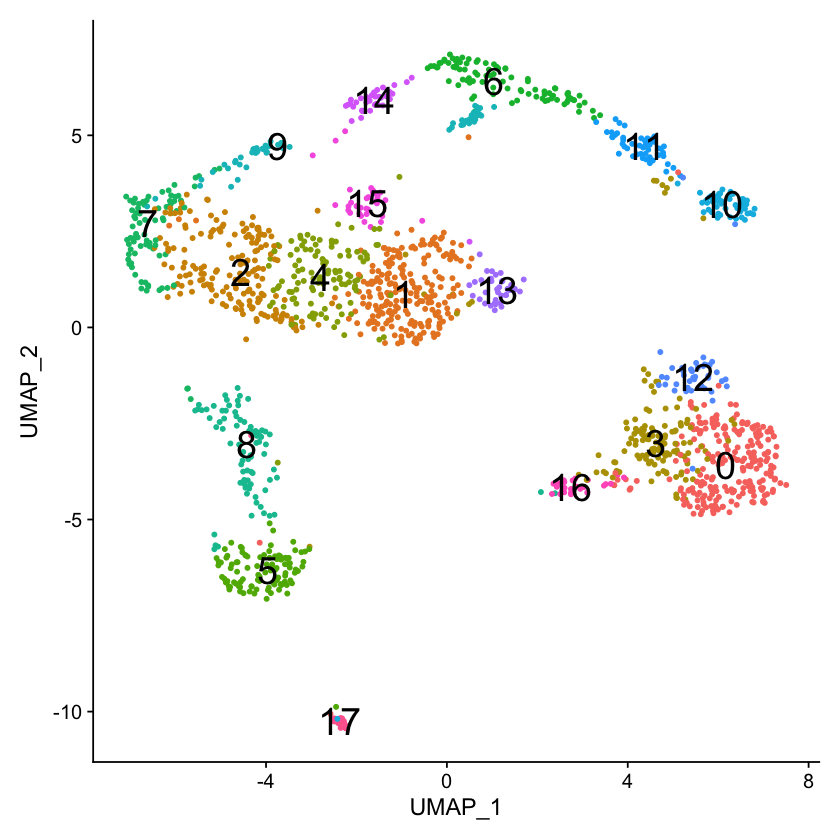

In [3]:
DimPlot(seu_HQC, reduction = 'umap', label = TRUE, label.size = 8) + NoLegend()

## Picking up target clusters

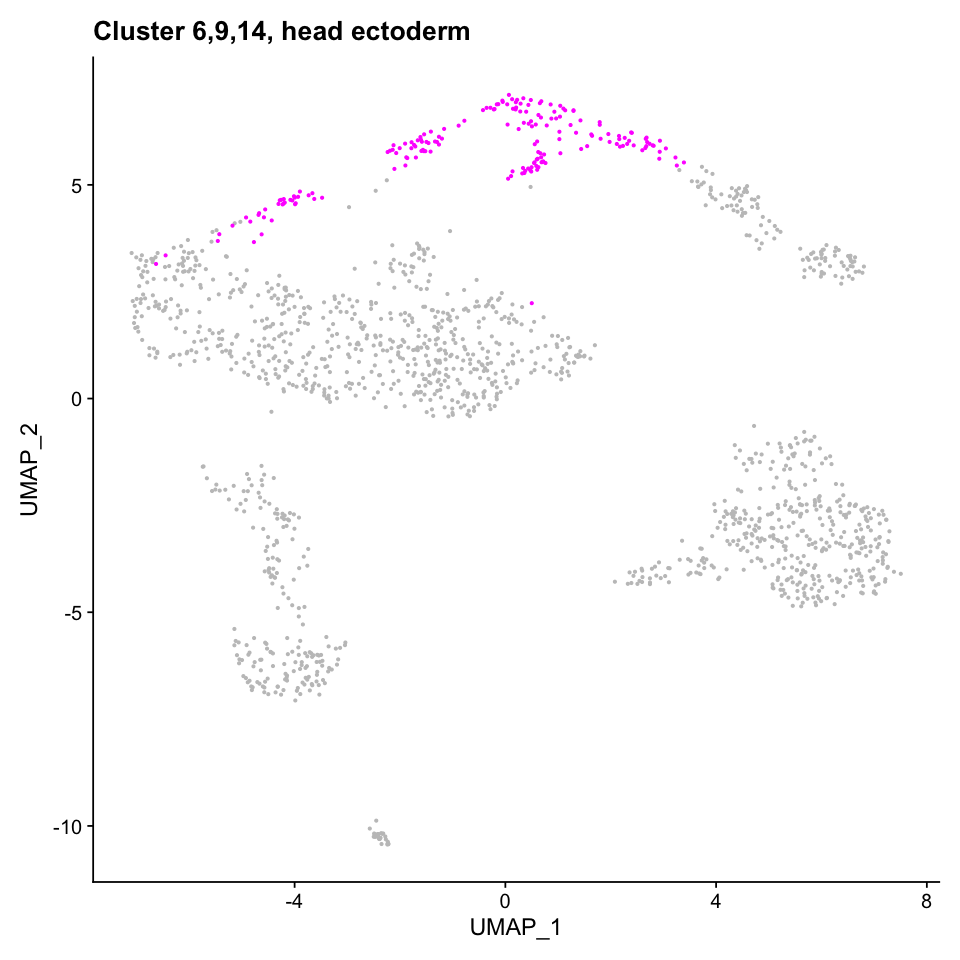

In [4]:
options(repr.plot.width=8, repr.plot.height=8)
highlight.cells <- WhichCells(seu_HQC,idents = c(6,14,9))
DimPlot(seu_HQC, reduction =  "umap", cells.highlight = highlight.cells, pt.size = 0.5, sizes.highlight = 0.5,
        cols.highlight = 'magenta', label = FALSE) + NoLegend()+ ggtitle('Cluster 6,9,14, head ectoderm')

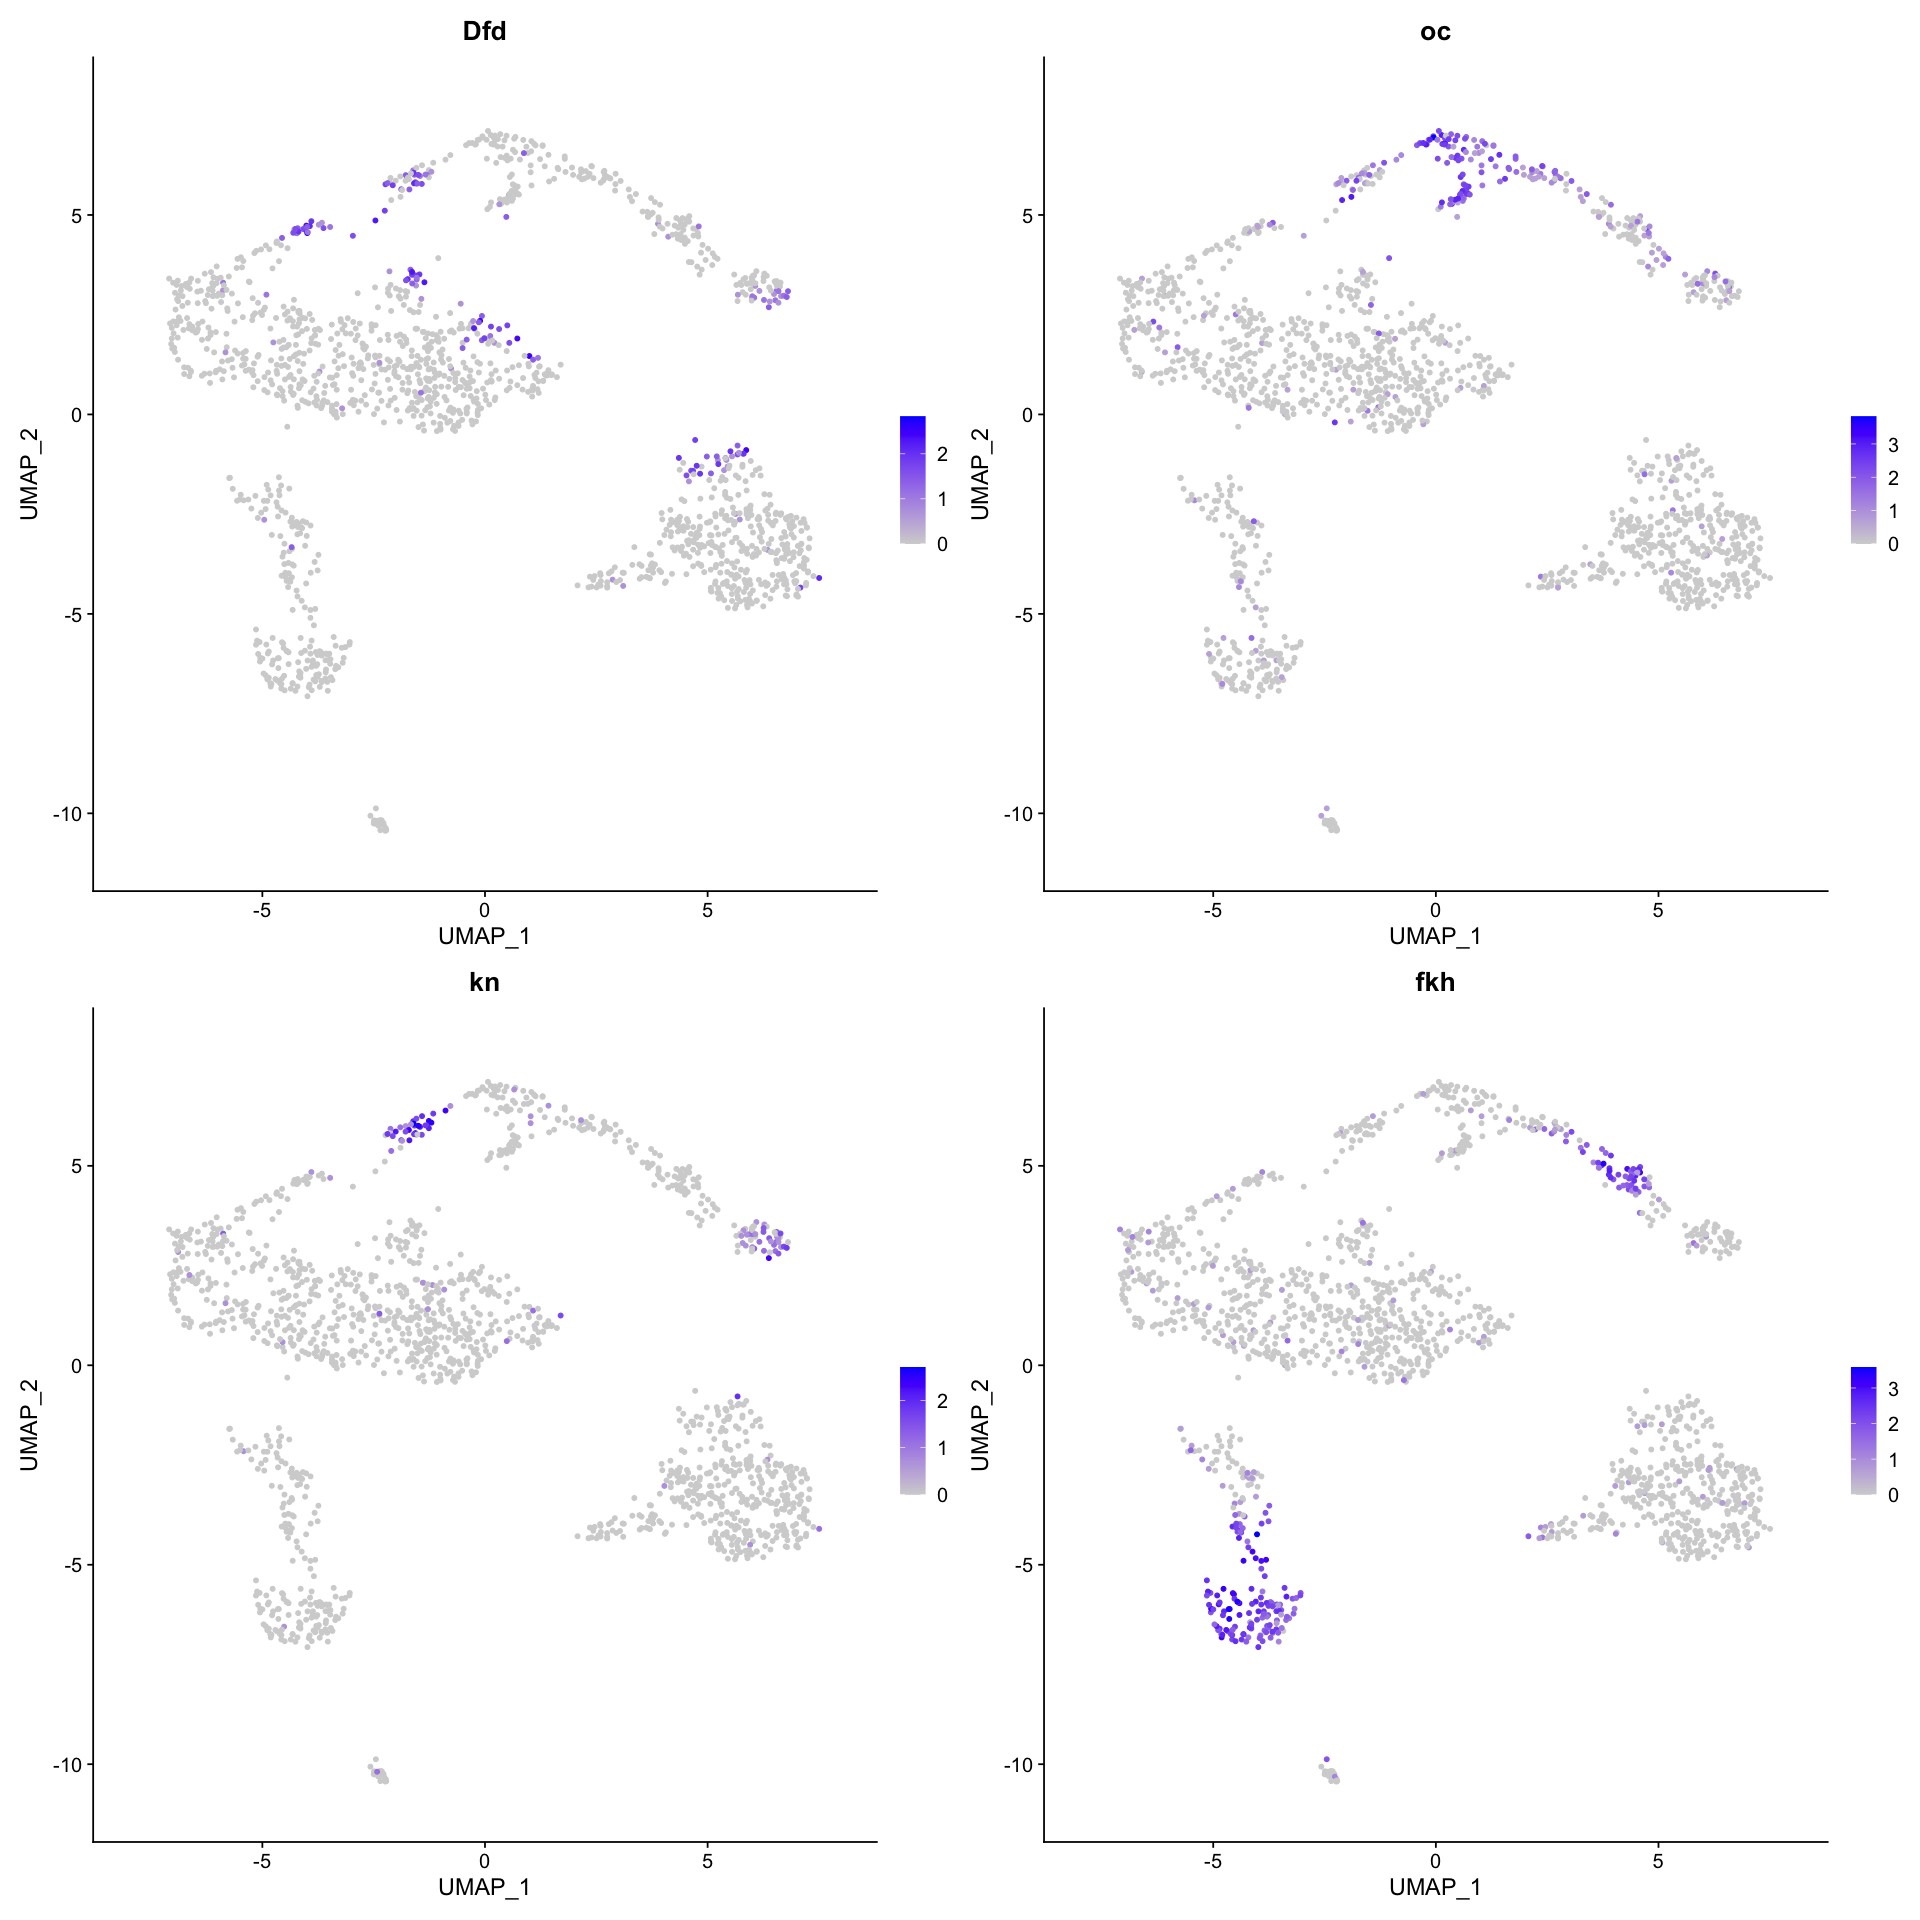

In [5]:
options(repr.plot.width=16, repr.plot.height=16)
FeaturePlot(seu_HQC, reduction = 'umap', features = c('Dfd', 'oc','kn','fkh'))

In [6]:
seu.head <- subset(seu_HQC, ident = c(6,9,14))
seu.head$all.cell.clusters <- seu.head$seurat_clusters
seu.head

An object of class Seurat 
24184 features across 186 samples within 2 assays 
Active assay: SCT (10063 features, 3000 variable features)
 1 other assay present: RNA
 2 dimensional reductions calculated: pca, umap

## Clustering
Num of cells < 500  
Skipping re-normalize

PC_ 1 
Positive:  Ilp4, twi, CG34224, hll, lncRNA:CR43887, VepD, tsh, lncRNA:bxd, Cyp310a1, sna 
	   ftz, Antp, ImpL2, CG3036, CG43355-sala, Mes2, Cys, CG12177, zfh1, CG14688 
	   CadN, ogre, Nplp2, Nrt, mid, CG16758, Ama, Ubx, run, CG9005 
Negative:  CG3502, oc, CG42342, CG13427, grn, fj, CG5059, kek1, CG43085, CG14204 
	   lncRNA:CR43302, CG15628, gt, Kank, cnc, Ance, Dll, lov, Sec61beta, Gasp 
	   toy, nrm, CG43184, Optix, Hsp83, tll, tna, egr, yellow-e3, Doc3 
PC_ 2 
Positive:  kek1, egr, Doc1, Ance, Dll, Doc3, Doc2, lov, cv-2, hbs 
	   Ama, tup, emc, bnl, grn, mirr, CG43184, Dtg, toc, salm 
	   net, ush, Sema5c, phu, CG13653, scyl, Kank, CG42788, chrb, CG14915 
Negative:  SoxN, sog, fj, D, rdx, oc, CG13427, pros, stg, apt 
	   brk, CG43394, knrl, Optix, noc, nrm, cnc, yellow-e3, CG5059, ovo 
	   CG3764, Sec61beta, yellow-e, CG3097, CG3502, Hsp83, sca, fd102C, phyl, PGRP-SC2 
PC_ 3 
Positive:  toy, tll, oc, so, CG14204, Gasp, CG42342, eya, lncRNA:CR43302, CG15696 
	   CG3502, CG152

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 186
Number of edges: 5522

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.6240
Number of communities: 5
Elapsed time: 0 seconds


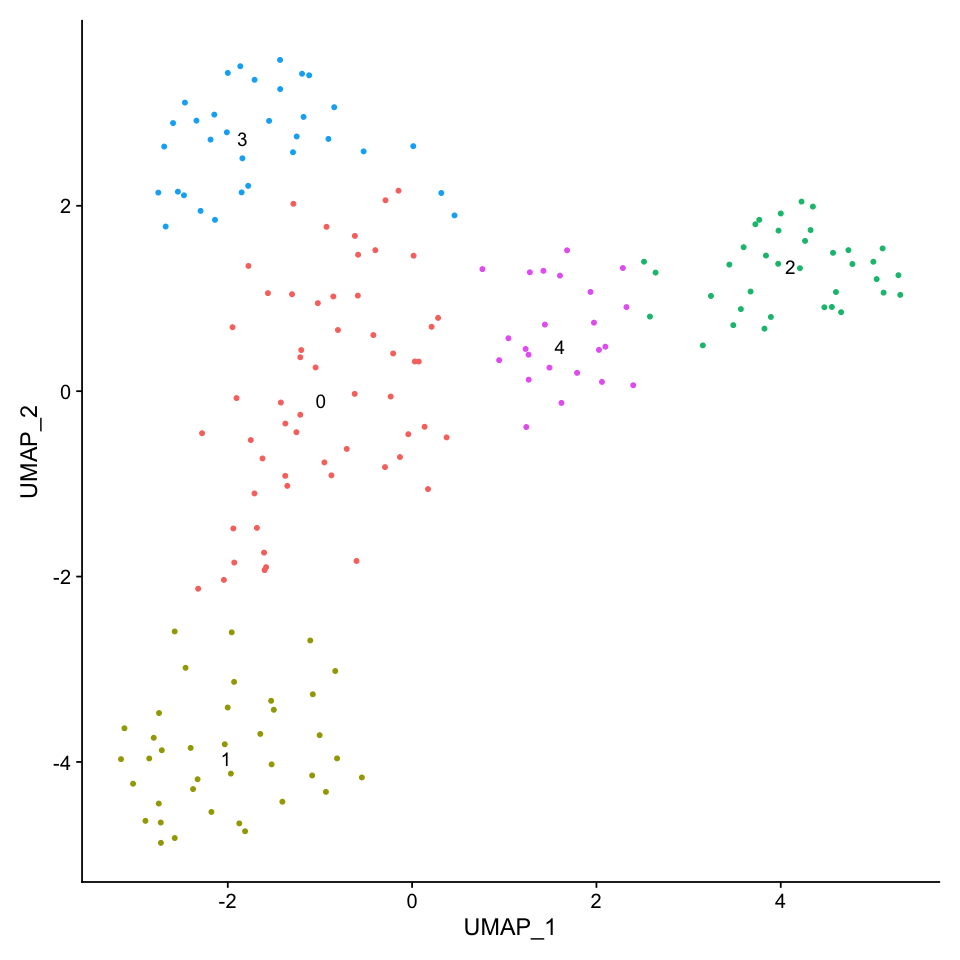

In [7]:
options(repr.plot.width=8, repr.plot.height=8)
seu.head <- RunPCA(seu.head)
seu.head <- RunUMAP(seu.head, dims = 1:30)
seu.head <- FindNeighbors(seu.head, dims = 1:30)
seu.head <- FindClusters(seu.head)
DimPlot(seu.head, reduction = 'umap', label = T) + NoLegend()

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 186
Number of edges: 5522

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.3109
Number of communities: 8
Elapsed time: 0 seconds


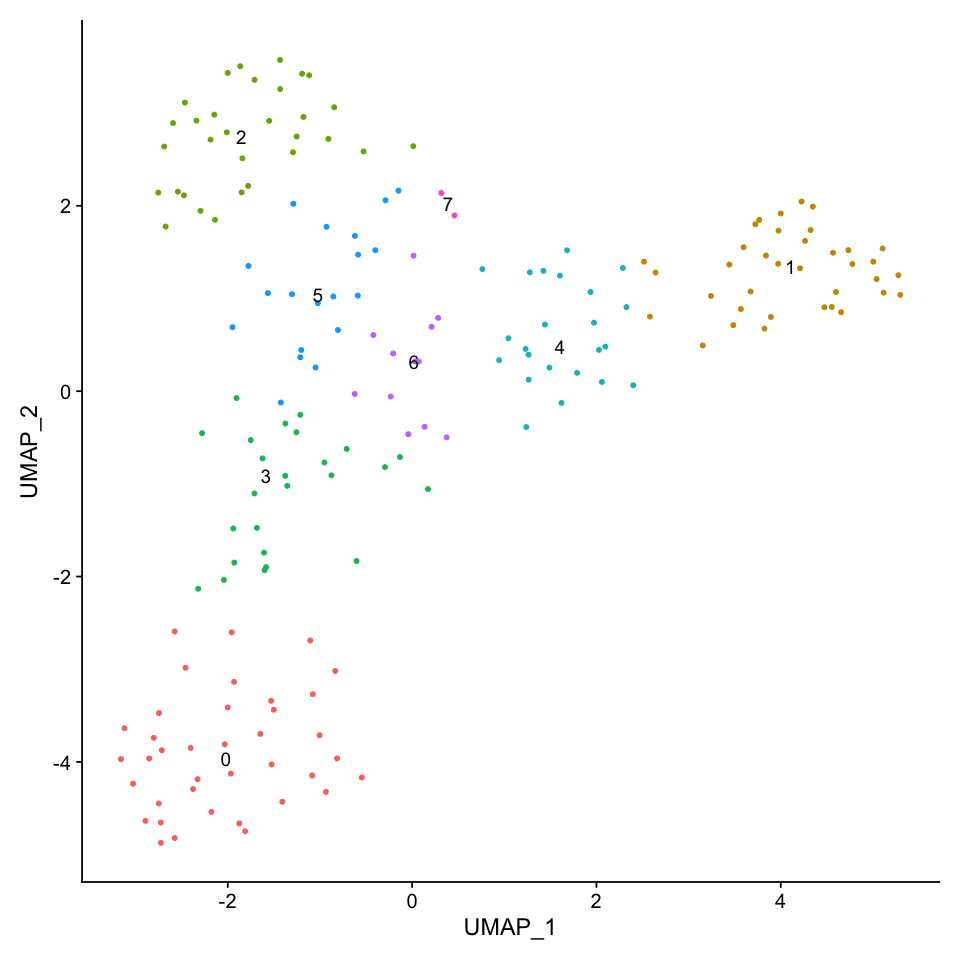

In [8]:
options(repr.plot.width=8, repr.plot.height=8)
seu.head <- FindClusters(seu.head, resolution = 2.4)
DimPlot(seu.head, reduction = 'umap', label = TRUE) + NoLegend()

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 186
Number of edges: 5522

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.3270
Number of communities: 7
Elapsed time: 0 seconds


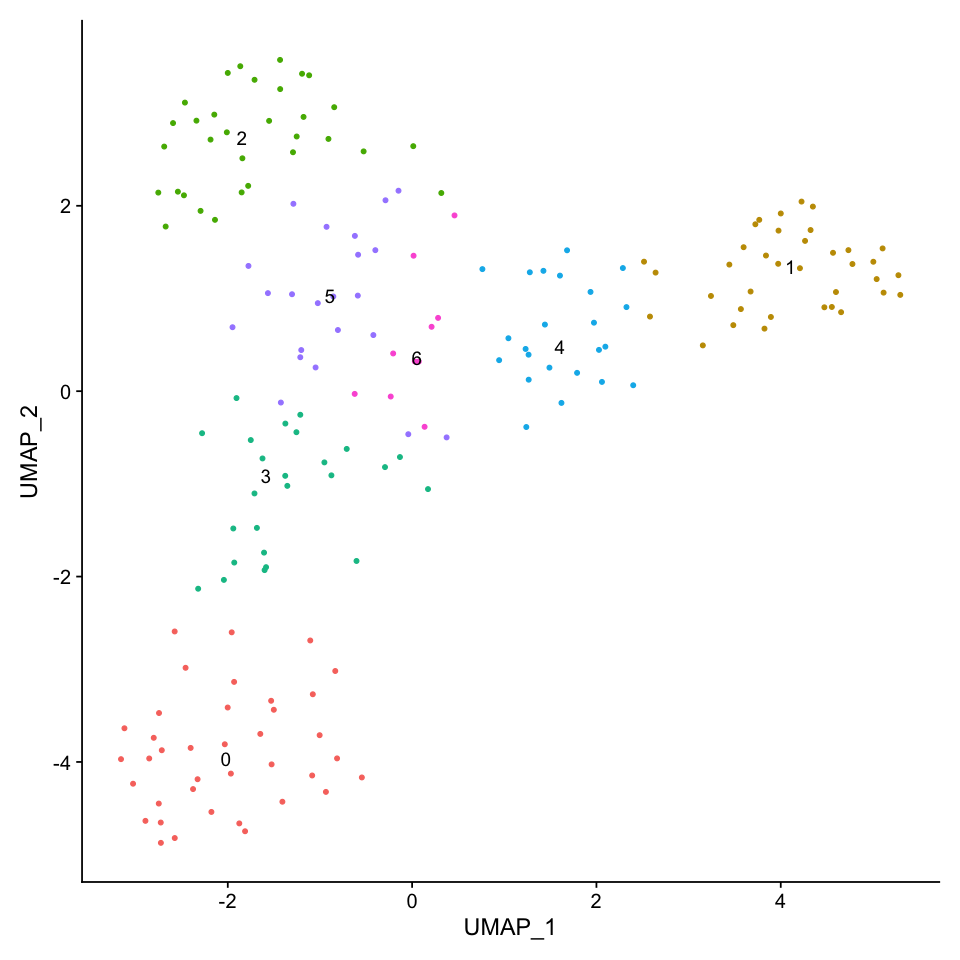

In [9]:
options(repr.plot.width=8, repr.plot.height=8)
seu.head <- FindClusters(seu.head, resolution = 2.3)
DimPlot(seu.head, reduction = 'umap', label = TRUE) + NoLegend()

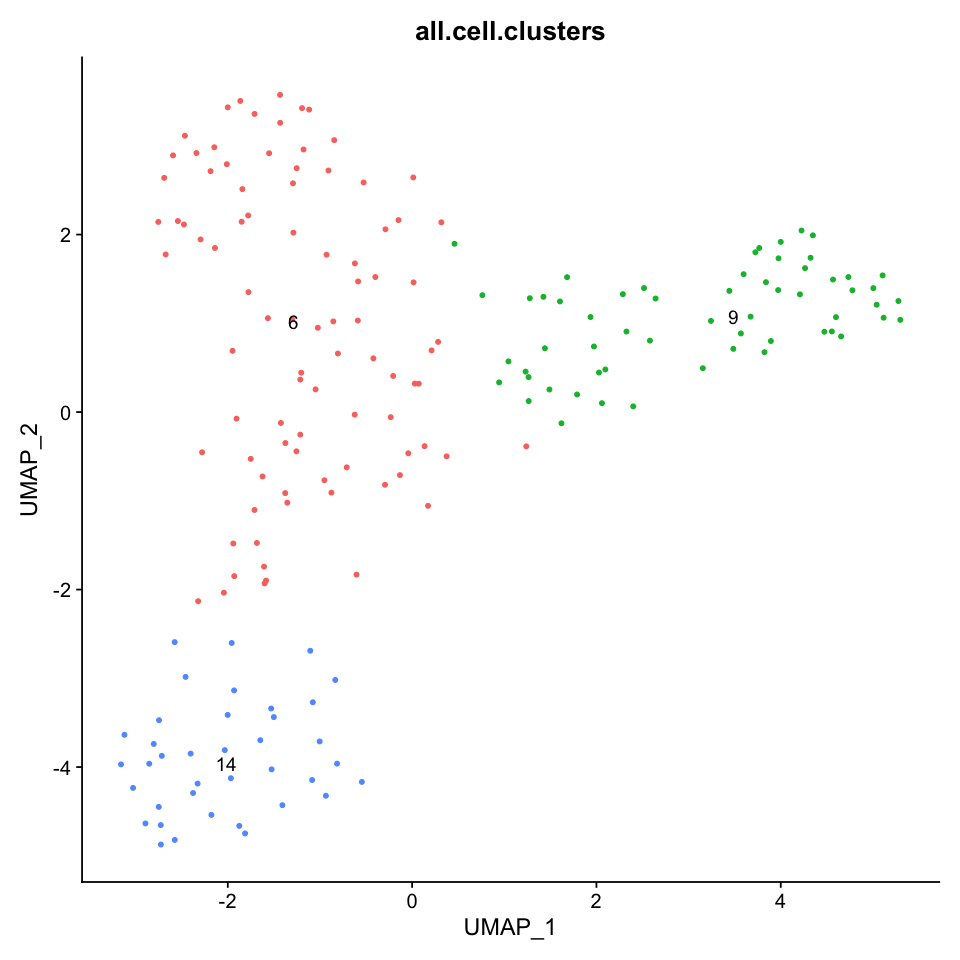

In [10]:
options(repr.plot.width=8, repr.plot.height=8)
DimPlot(seu.head, reduction = 'umap', label = TRUE, group.by = 'all.cell.clusters') + NoLegend()

In [11]:
levels(seu.head) <- c(1,0,4,6,3,5,2)
all.markers <- FindAllMarkers(object = seu.head, only.pos = TRUE)
nrow(all.markers)
all.markers.top10 <- all.markers %>% group_by(cluster) %>% top_n(n = 10, wt = avg_logFC)
nrow(all.markers.top10)

Calculating cluster 1

Calculating cluster 0

Calculating cluster 4

Calculating cluster 6

Calculating cluster 3

Calculating cluster 5

Calculating cluster 2



[1] 763

[1] 70

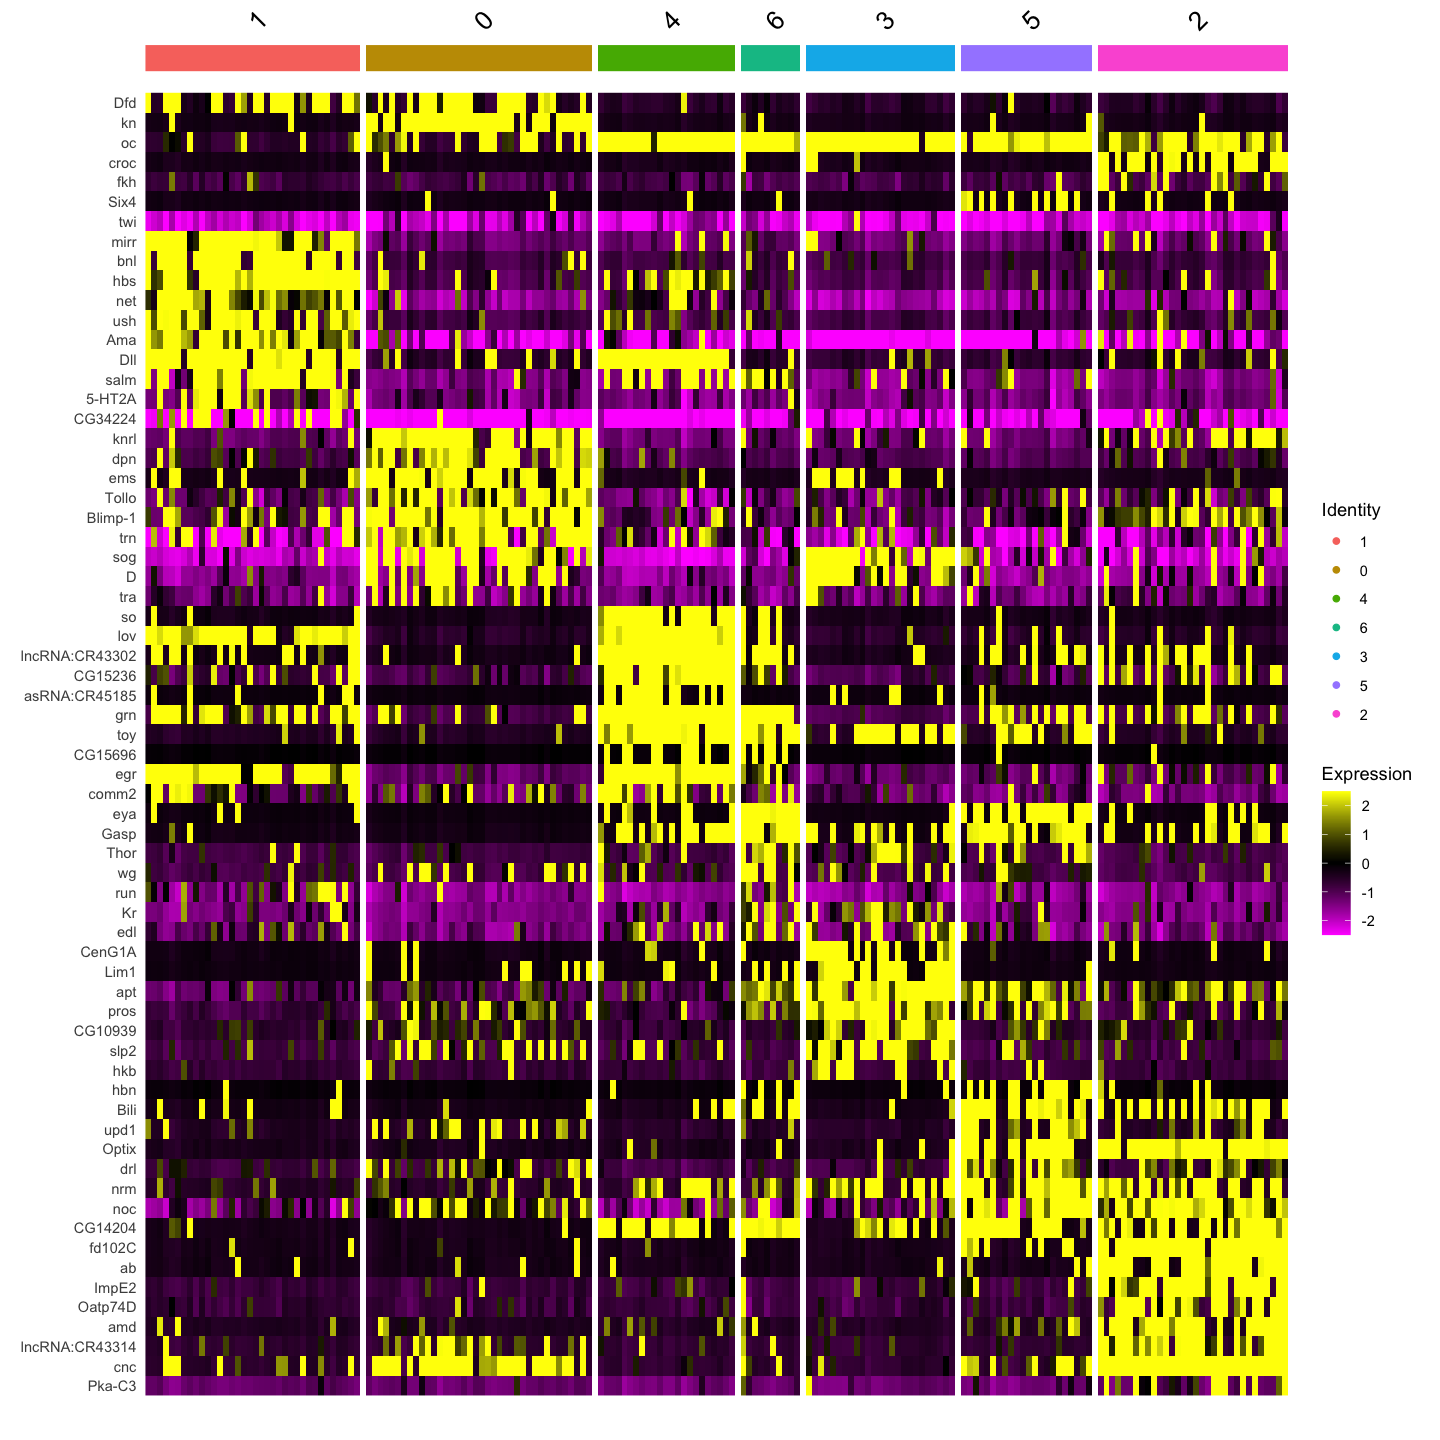

In [12]:
options(repr.plot.width=12, repr.plot.height=12)
DoHeatmap(seu.head, features = c('Dfd','kn','oc','croc','fkh','Six4','twi',all.markers.top10$gene))

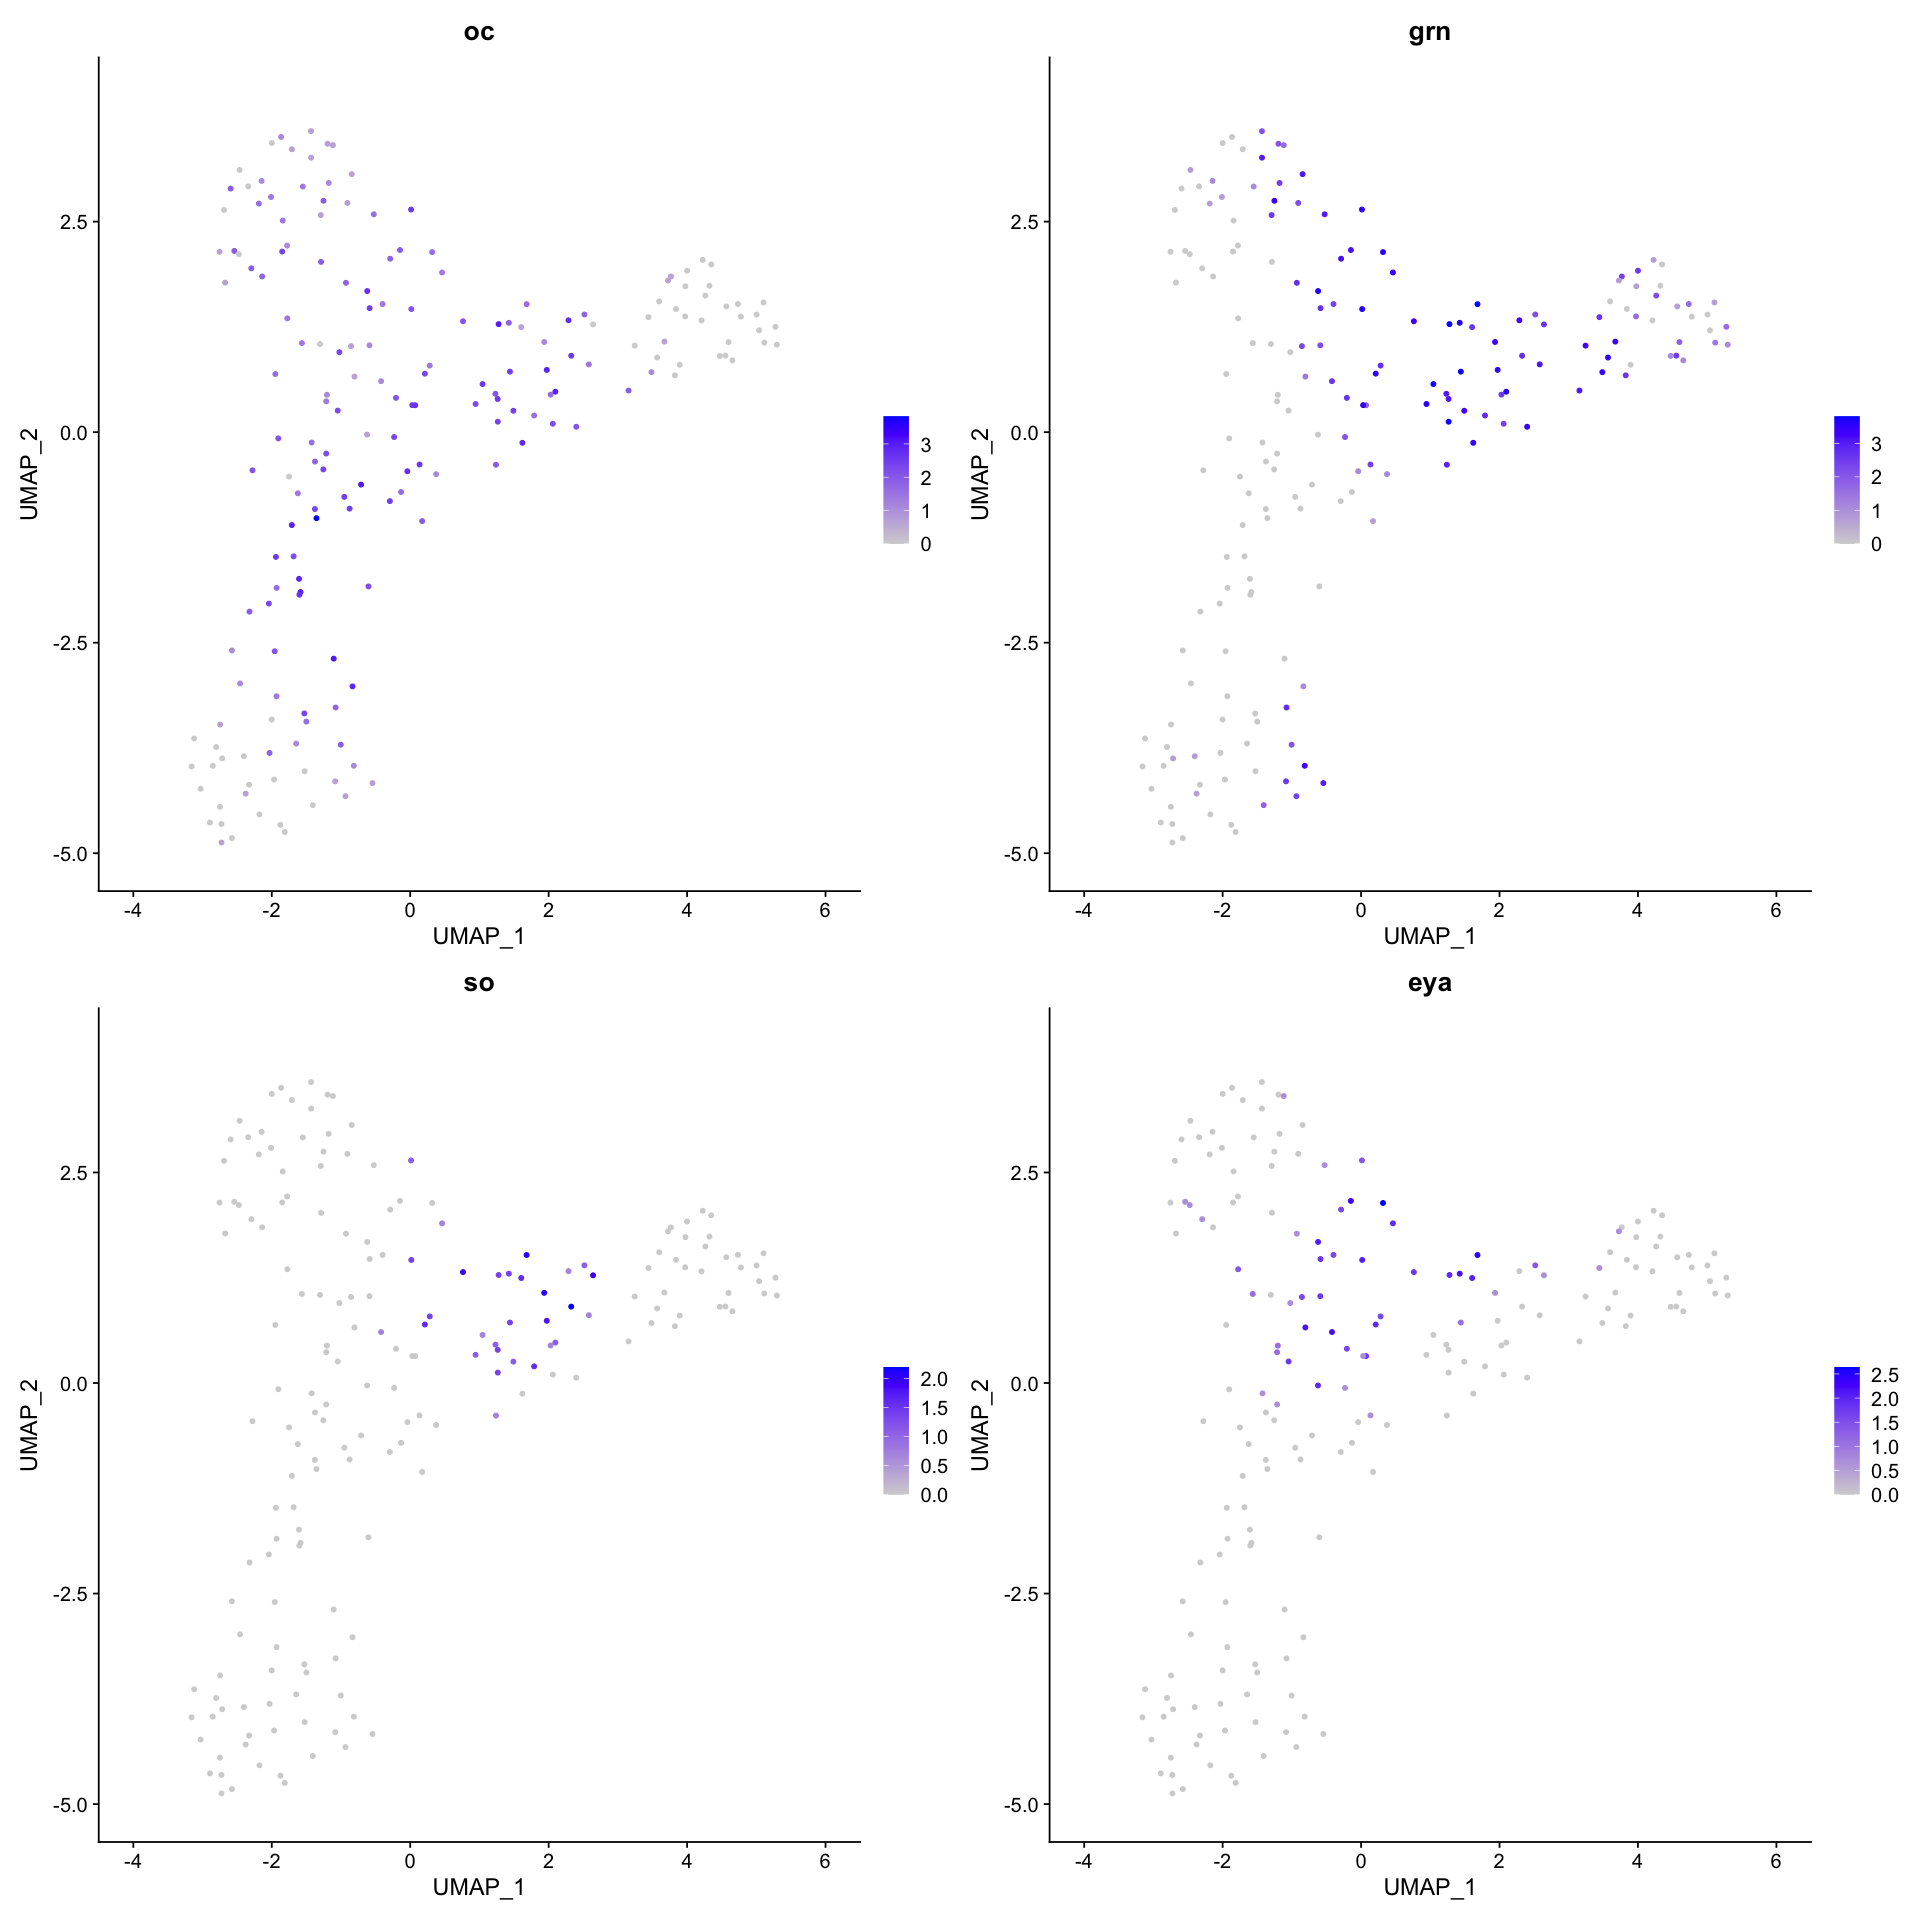

In [13]:
options(repr.plot.width=16, repr.plot.height=16)
FeaturePlot(seu.head, reduction = 'umap', features = c('oc', 'grn','so','eya'))

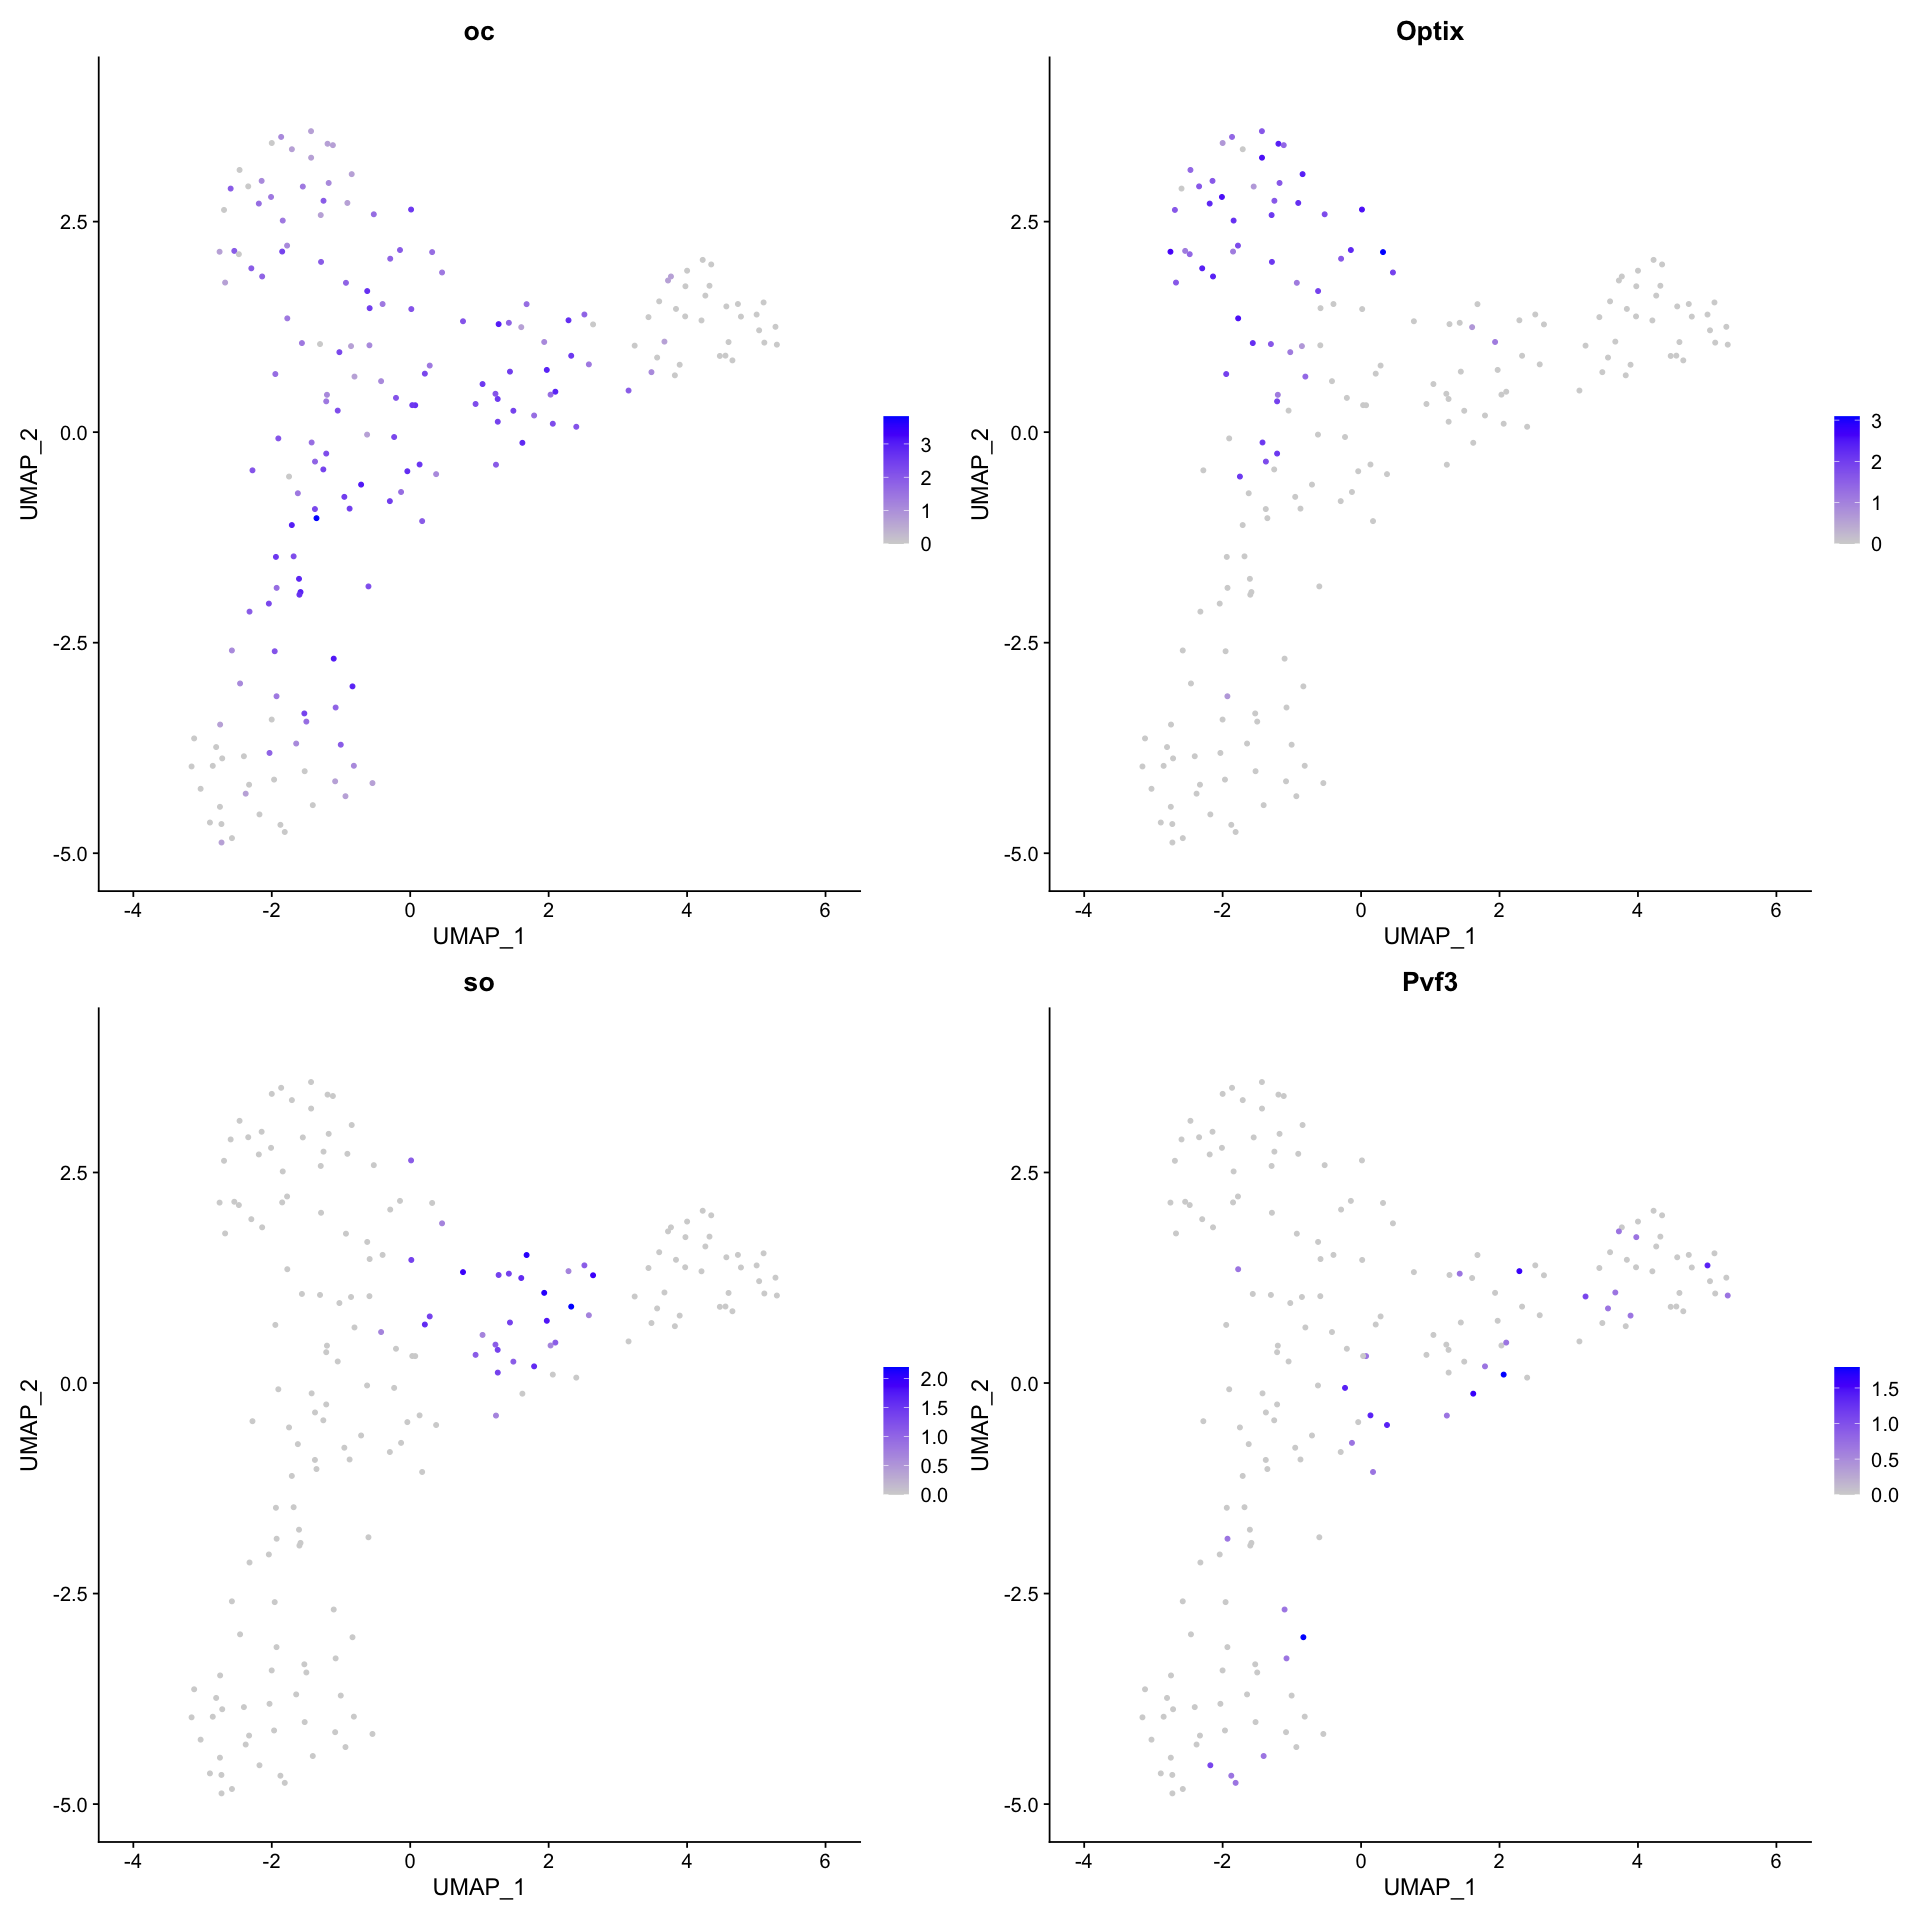

In [14]:
options(repr.plot.width=16, repr.plot.height=16)
FeaturePlot(seu.head, reduction = 'umap', features = c('oc', 'Optix','so','Pvf3'))

## Add annotation

,manual_ID
,<fct>
GSM2494786_CGGTTTAAGTAC,2
GSM2494786_ACGGCCATGGAT,0
GSM2494786_TCAGCTTTAGAC,4
GSM2494786_ACTTAATATTCT,3
GSM2494786_TCAAGCGAATGA,2
GSM2494786_GCATATATTCAT,2


,manual_ID
,<fct>
GSM2494786_CGGTTTAAGTAC,ectoderm_head_croc
GSM2494786_ACGGCCATGGAT,ectoderm_head_kn
GSM2494786_TCAGCTTTAGAC,ectoderm_head_oc_so
GSM2494786_ACTTAATATTCT,ectoderm_head_oc_CenG1A
GSM2494786_TCAAGCGAATGA,ectoderm_head_croc
GSM2494786_GCATATATTCAT,ectoderm_head_croc


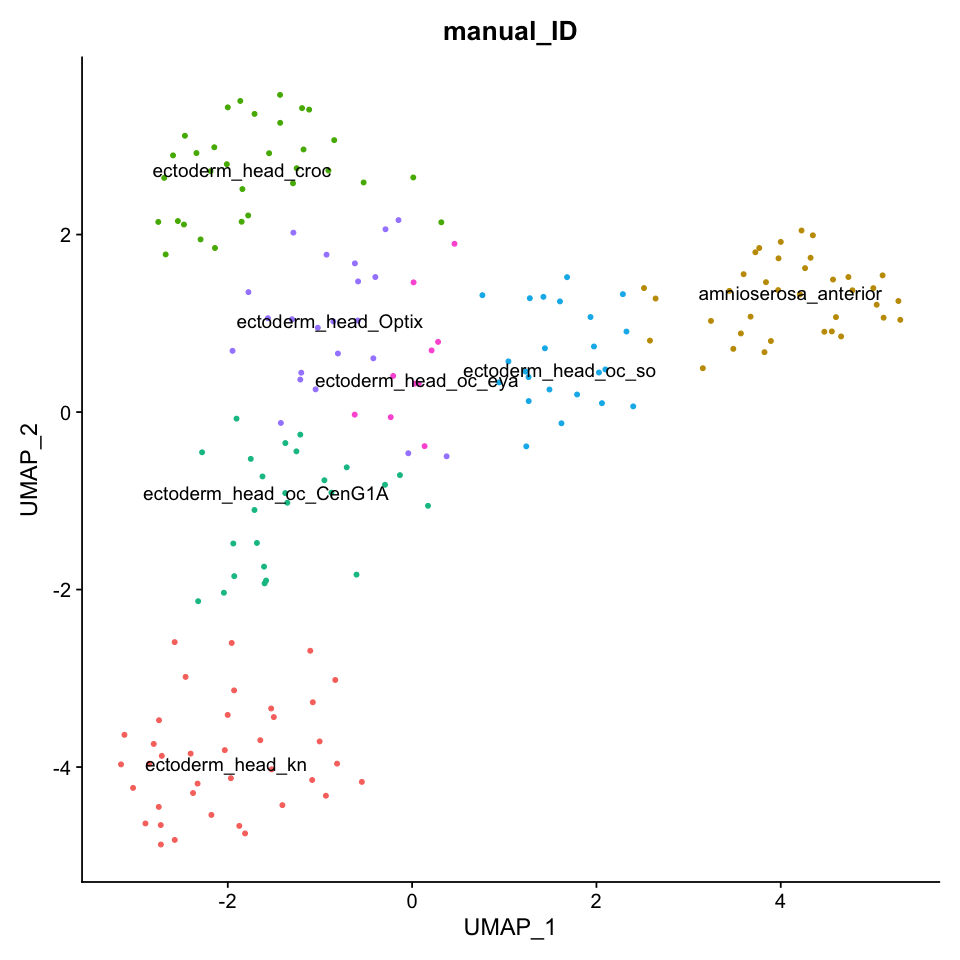

In [15]:
manual_id <- as.data.frame(seu.head$seurat_clusters)
colnames(manual_id) <- c('manual_ID')
head(manual_id)
manual_id$manual_ID = dplyr::recode(manual_id$manual_ID, 
                                     "1"="amnioserosa_anterior", 
                                     "0"="ectoderm_head_kn",
                                     "4"="ectoderm_head_oc_so",
                                     "6"="ectoderm_head_oc_eya",
                                     "3"="ectoderm_head_oc_CenG1A",
                                     "5"="ectoderm_head_Optix",
                                     "2"="ectoderm_head_croc"
                                    )
                                    

head(manual_id)
seu.head$manual_ID <- manual_id
options(repr.plot.width=8, repr.plot.height=8)
DimPlot(seu.head, reduction = 'umap', label = T, group.by = 'manual_ID') + NoLegend() 

In [16]:
Idents(seu.head) <- 'manual_ID'
levels(seu.head) <- c('amnioserosa_anterior','ectoderm_head_kn',
                      'ectoderm_head_oc_so','ectoderm_head_oc_eya','ectoderm_head_oc_CenG1A',
                      'ectoderm_head_Optix','ectoderm_head_croc')
all.markers <- FindAllMarkers(object = seu.head, only.pos = TRUE)
nrow(all.markers)
all.markers.top10 <- all.markers %>% group_by(cluster) %>% top_n(n = 10, wt = avg_logFC)
nrow(all.markers.top10)

Calculating cluster amnioserosa_anterior

Calculating cluster ectoderm_head_kn

Calculating cluster ectoderm_head_oc_so

Calculating cluster ectoderm_head_oc_eya

Calculating cluster ectoderm_head_oc_CenG1A

Calculating cluster ectoderm_head_Optix

Calculating cluster ectoderm_head_croc



[1] 763

[1] 70

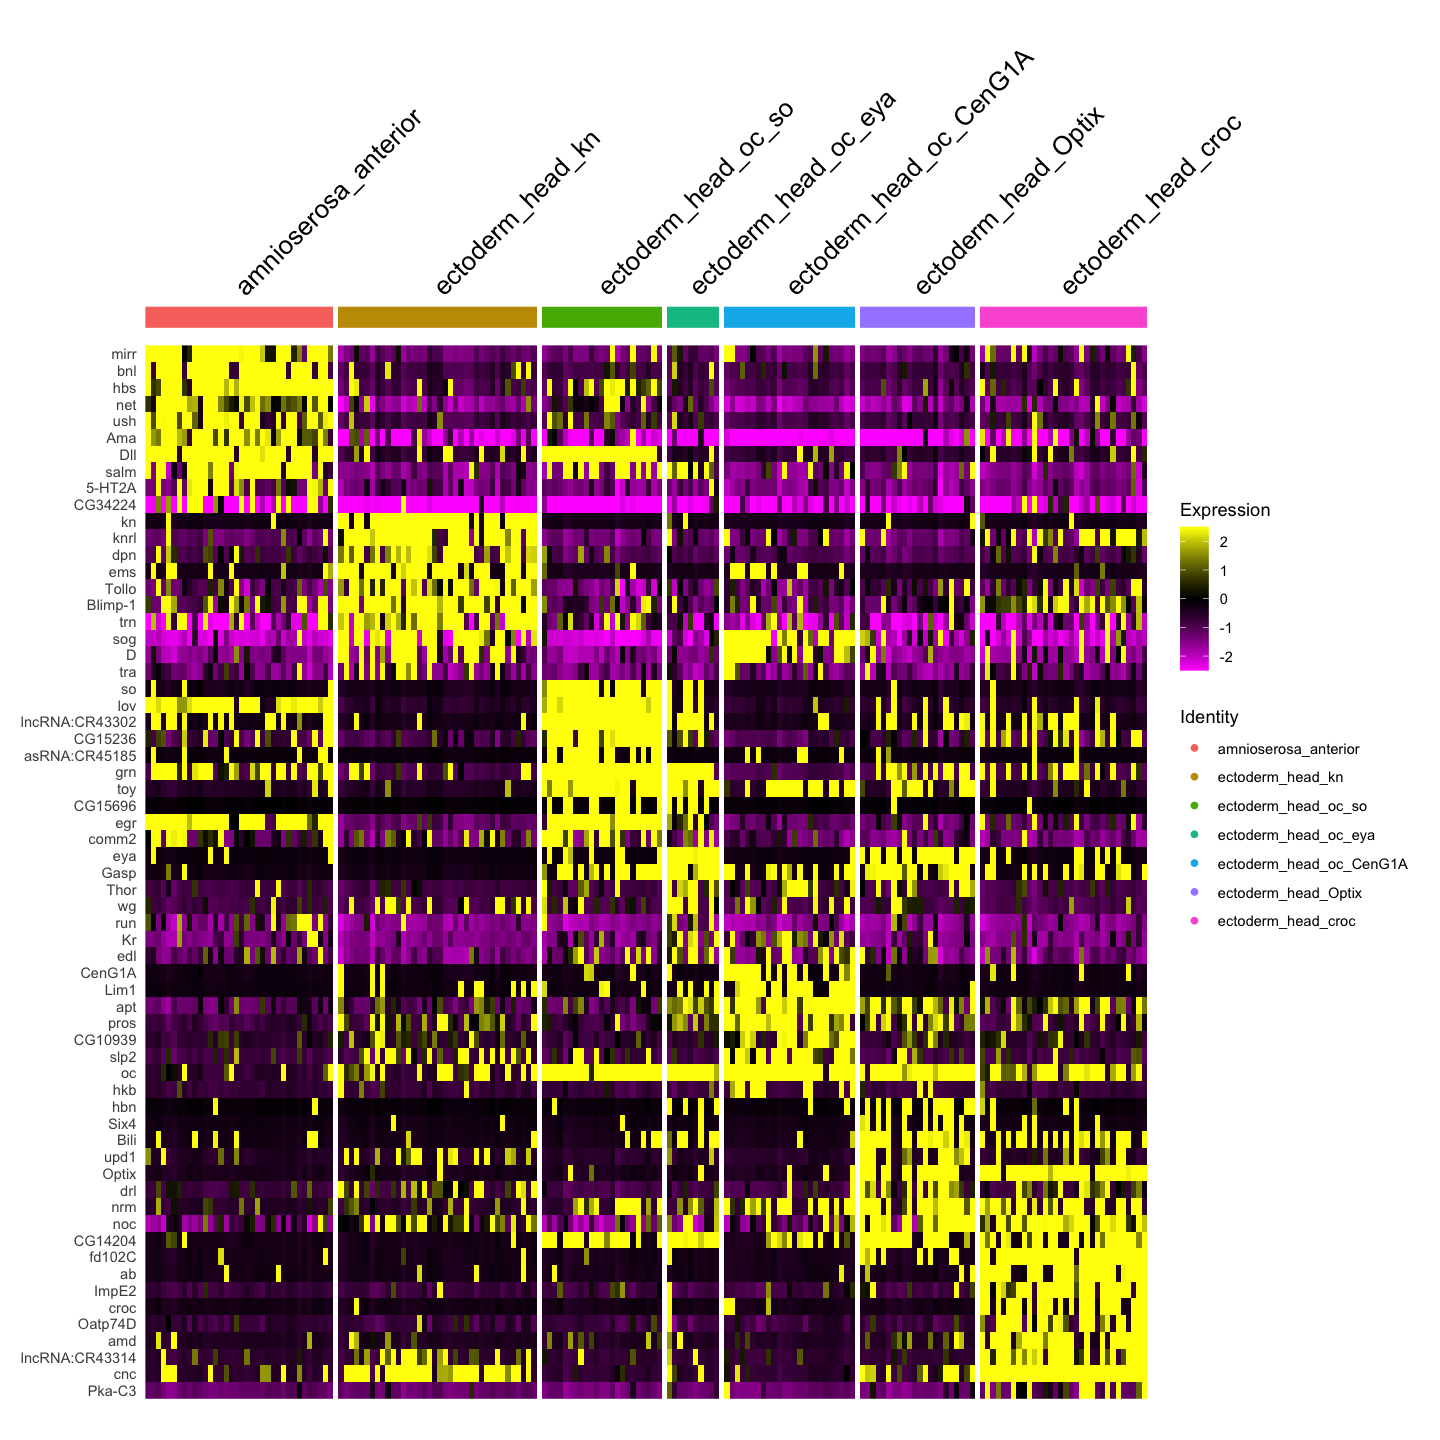

In [17]:
options(repr.plot.width=12, repr.plot.height=12)
DoHeatmap(seu.head, features = c(all.markers.top10$gene))

Saving 7 x 7 in image



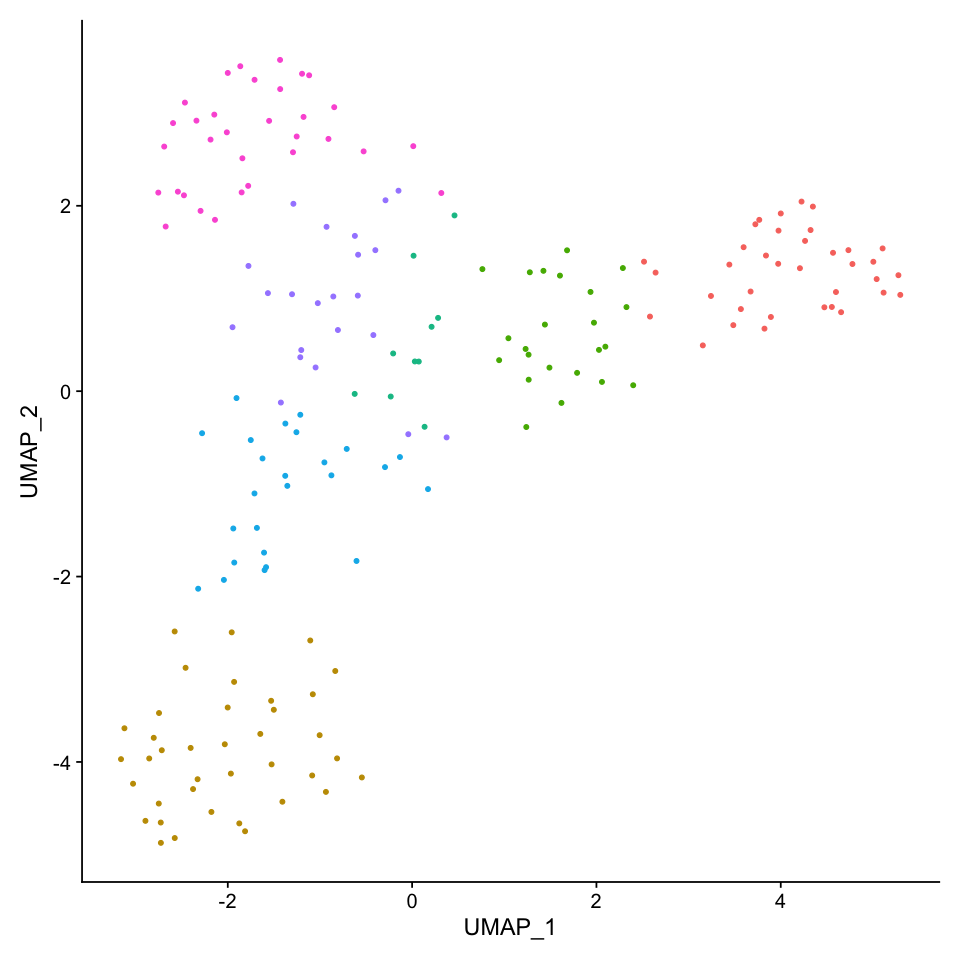

In [18]:
options(repr.plot.width=8, repr.plot.height=8)
fig <- DimPlot(seu.head, reduction =  "umap", label = FALSE) + NoLegend() 

fig
ggsave(fig, file = "./figures/02_head_subclustering_NK/head_umap1.eps", dpi = 300)

Saving 7 x 7 in image



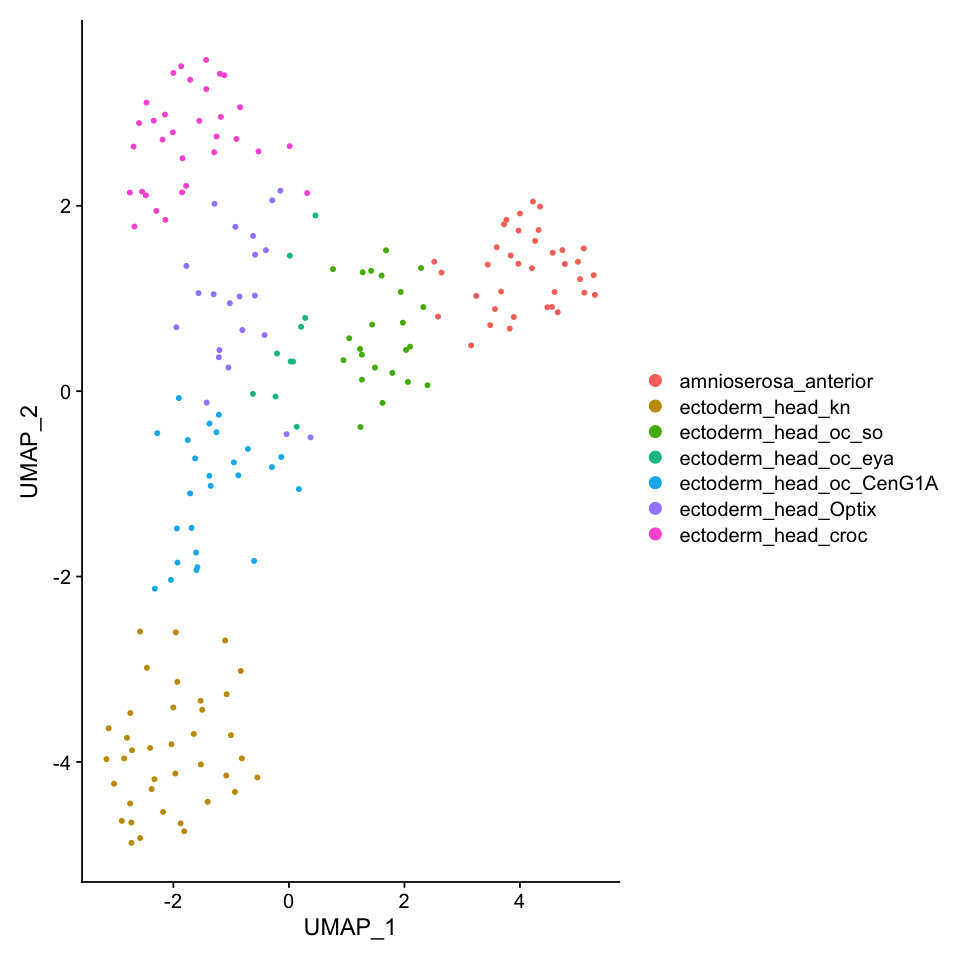

In [19]:
options(repr.plot.width=8, repr.plot.height=8)
fig <- DimPlot(seu.head, reduction =  "umap", label = FALSE)

fig
ggsave(fig, file = "./figures/02_head_subclustering_NK/head_umap2.eps", dpi = 300)

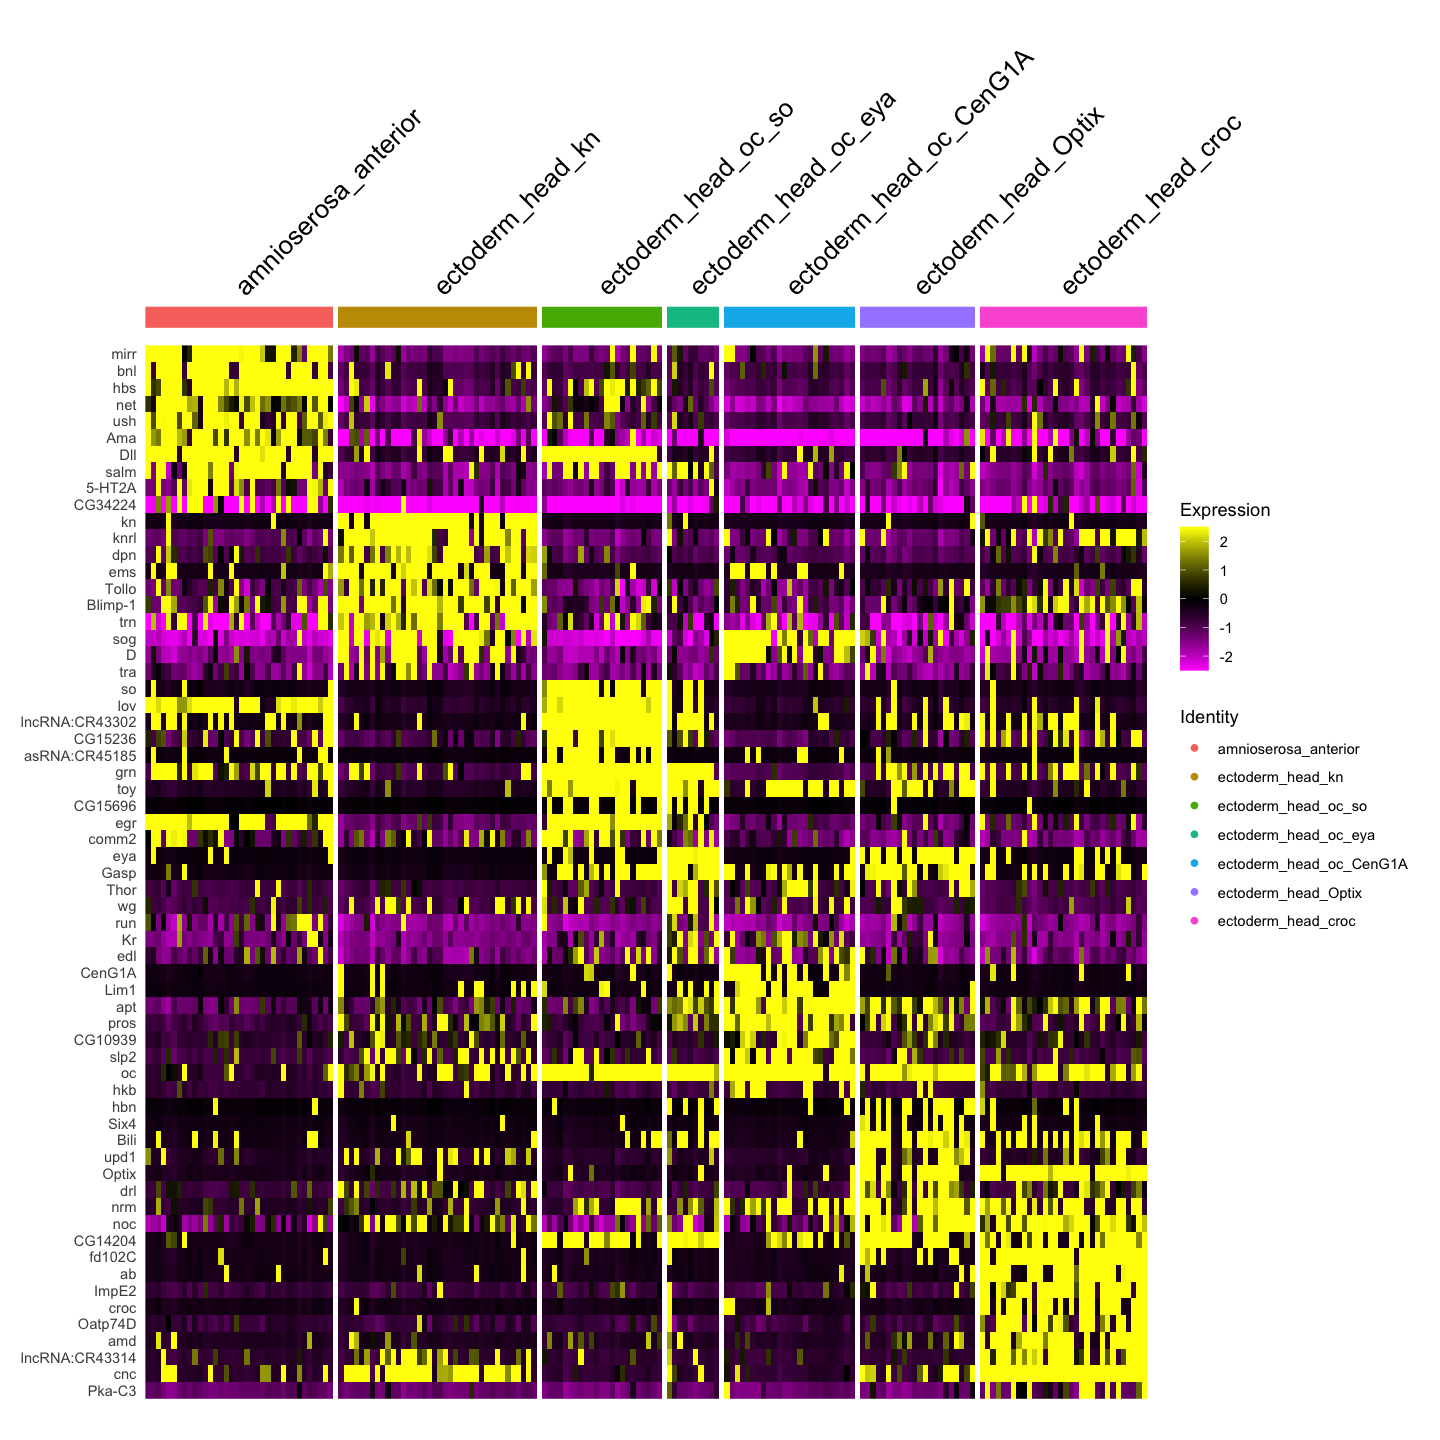

In [20]:
options(repr.plot.width=12, repr.plot.height=12)
fig <- DoHeatmap(seu.head, features = c(all.markers.top10$gene))
fig
ggsave(fig, file = "./figures/02_head_subclustering_NK/head_manualID_heatmap.eps", dpi = 300,  width = 12, height = 8)

In [21]:
saveRDS(object = seu.head, file = '../../data/seurat_object/NK-data/subclustering/2022801_seu_head_subclustering_NK.obj')

In [22]:
sessionInfo()

R version 4.0.3 (2020-10-10)
Platform: x86_64-apple-darwin17.0 (64-bit)
Running under: macOS Catalina 10.15.7

Matrix products: default
BLAS:   /Library/Frameworks/R.framework/Versions/4.0/Resources/lib/libRblas.dylib
LAPACK: /Library/Frameworks/R.framework/Versions/4.0/Resources/lib/libRlapack.dylib

locale:
[1] ja_JP.UTF-8/ja_JP.UTF-8/ja_JP.UTF-8/C/ja_JP.UTF-8/ja_JP.UTF-8

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] tibble_3.0.5      dplyr_1.0.3       Matrix_1.3-2      data.table_1.13.6
[5] magrittr_2.0.1    ggplot2_3.3.3     Seurat_3.2.3     

loaded via a namespace (and not attached):
  [1] nlme_3.1-151          matrixStats_0.57.0    RcppAnnoy_0.0.18     
  [4] RColorBrewer_1.1-2    httr_1.4.2            repr_1.1.0           
  [7] sctransform_0.3.2     tools_4.0.3           R6_2.5.1             
 [10] irlba_2.3.3           rpart_4.1-15          KernSmooth_2.23-18   
 [13] uwot_0.1.10           mgcv